# 이동평균(Moving average)선

### 이동평균선을 사용하는 이유
- 트렌드 파악(Trend Identification): 이동평균은 주어진 기간 동안의 평균값을 계산하기 때문에, 시계열 데이터의 트렌드를 파악하는데 도움된다. 이를 시각화하면 데이터의 장기적인 흐름을 파악할 수 있으며, 상승 또는 하락 추세를 식별할 수 있다.

- 잡음 제거(Noise Cancellation): 이동평균은 시계열 데이터에서의 잡음을 제거하는데 효과적이다. 시계열 데이터의 부드러툰 패턴을 보다 명확하게 파악할 수 있다.

- 이상치 탐지(Anomaly Detection): 이도영균은 이상치(outlier)를 탐지하는 데에서 사용될 수 있다. 주어진 기간의 평균 값을 계산하기 때문에, 이동평균선에서 크게 벗어나는 데이터 포인트는 이상치로 간주될 수 있다.

- 신호 감지(Signal Detection): 이동평균선은 시계열 데이터의 신호 발생을 감지하는데 사용할 수 있다. 예를 들어, 주가 데이터에서 단기 이동평균과 장기 이동평균의 교차점을 확인하면, 매수 혹은 매도 신호로 활용할 수 있다. 이를 통해 투자 전략을 구현하거나 거래 시점을 결정하는데 도움이 될 수 있다.

In [2]:
# 필요한 라이브러리 설치
# !pip install pyupbit
# 예시 데이터로 사용할 비트코인 데이터를 가져오기 위해 업비트 api 사용

import pyupbit as pu
import matplotlib.pyplot as plt

# 비트코인의 종가와 거래량 데이터 추출, 1분 단위의 3000개의 데이터
bitcoin = pu.get_ohlcv(ticker="KRW-BTC", interval='minute1', count=3000)[['close', 'volume']]

# 이동평균(Moving Average) 값 계산 및 열 추가 함수 정의
def movingAverage(data, ma_periods):
    for period in ma_periods:
        column_name = f'ma_{period}'
        data[column_name] = data['close'].rolling(window=period).mean()
        
    return data

### 이동평균선 그리기

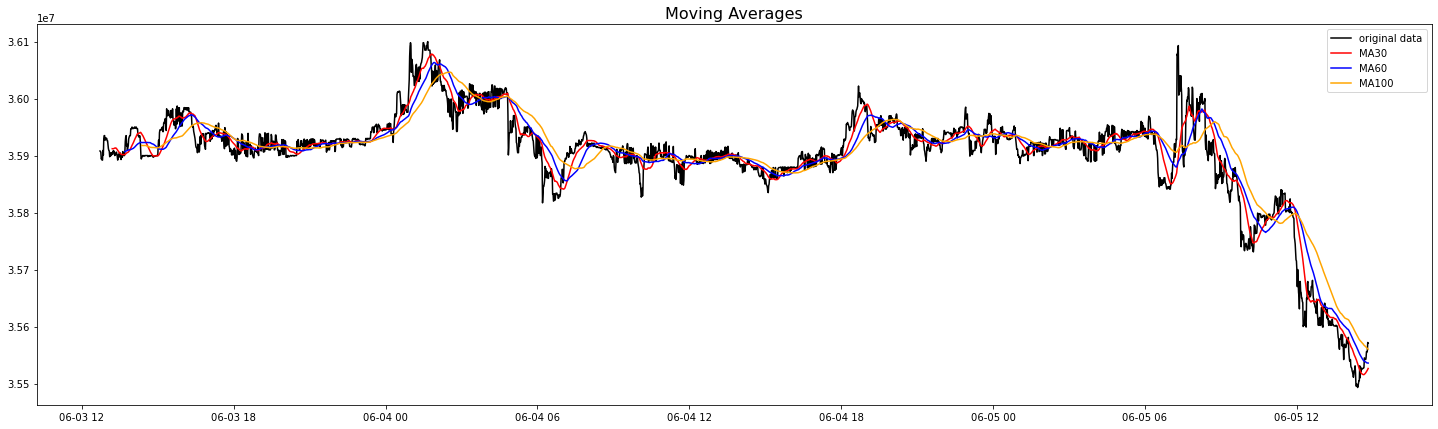

In [24]:
# 이동평균(Moving Average) 계산을 위한 기간 설정
ma_periods = [30, 60, 100]

MA_bitcoin = movingAverage(bitcoin, ma_periods)

fig, ax = plt.subplots(figsize=(25, 7))

ax.plot(MA_bitcoin.close, color='black', label='original data')
ax.plot(MA_bitcoin.ma_30, color='red', label='MA30')
ax.plot(MA_bitcoin.ma_60, color='blue', label='MA60')
ax.plot(MA_bitcoin.ma_100, color='orange', label='MA100')

ax.set_title('Moving Averages', fontsize=16)
ax.legend()

plt.show()